In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4
## Exploratory Data Analysis (EDA) and Visualization
## Due on Gradescope



### Detailed Submission Instructions Are Provided at the end of this Notebook







## Collaboration Policy

Data science is a collaborative activity.  However a key step in learning and retention is **creating solutions on your own.**  

Please see the **Course Syllabus for the Collaboration Policy**.

On the other hand, the following are some **examples of things which would NOT usually be
considered to be cheating**:
 - Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck.  After clarifying any questions you should then continue to write your solution independently.
 - Asking someone (or searching online) how a particular construct in the language works.
 - Asking someone (or searching online) how to formulate a particular construct in the language.
 - Asking someone for help in finding an error in your program.  
 - Asking someone why a particular construct does not work as you expected in a given program.
   

To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.   


If you have difficulty in formulating the general solution to a problem on your own, or
you have difficulty in translating that general solution into a program, it is advisable to see
your instructor.

We are here to help!  Visit HW Hours and/or post questions on Piazza!

## Introduction


In this assignment, you will perform tasks to clean, visualize, and explore data. You will also investigate open-ended questions. These open-ended questions ask you to think critically about how the plots you have created provide insight into the data.

After completing this assignment, you should be comfortable with:

* wrangling data for analysis
* using EDA to learn about your data 
* making informative plots


### Content Warning
This HW includes an analysis of crime in Berkeley. If you feel uncomfortable with this topic, **please contact your instructor.**

## Grading
Grading is broken down into autograded answers and free response. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

For plots, your plots should be *similar* to the given examples. We will tolerate small variations such as color differences or slight variations in scale. However it is in your best interest to make the plots as similar as possible, as similarity is subject to the readers.

**Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?** 

### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1a | 6 | manual
Question 1b | 2 | autograded
Question 1c | 2 | autograded
Question 1d | 2 | autograded
Question 2a | 4 | autograded
Question 2b | 3 | autograded
Question 2c | 3 | manual
Question 2d | 3 | autograded
Question 2e | 4 | manual
Question 2f | 2 | manual
Question 3a| 4 | autograded
Question 3b | 3 | autograded
Question 3c | 6 | manual
Question 3d | 3 | manual
Question 3e | 3 | manual
|Total | 50



### Matplotlib and Seaborn Table of Common Functions

`x` and `y` are sequences of values (i.e. arrays, lists, or Series).

| Function | Description |
| -------- | ----------- |
| `plt.plot(x, y)` | Creates a line plot of `x` against `y` |
| `plt.title(name)` | Adds a title `name` to the current plot |
| `plt.xlabel(name)` | Adds a label `name` to the x-axis |
| `plt.ylabel(name)` | Adds a label `name` to the y-axis |
| `plt.scatter(x, y)` | Creates a scatter plot of `x` against `y` |
| `plt.hist(x, bins=None, density=True)` | Creates a density histogram of `x`; `bins` can be an integer or a sequence |
| `plt.bar(x, height)` | Creates a bar plot of categories `x` and corresponding heights `height` |
| `plt.barh(y, length)` | Creates a bar plot of categories `y` and corresponding lengths `length` |
| `sns.histplot(data, x, y, hue, kde, stat)` | Creates a distribution plot; `data` is a DataFrame; `x`, `y` are column names in `data` that specify positions on the x and y axes; `hue` is a column name in `data` that adds subcategories to the plot based on `hue`; `kde` is a boolean that determines whether to overlay a KDE curve; `stat=density` will create a density plot |
|`sns.kdeplot(x, y)` |  Creates a kernel density estimate plot; `x`, `y` are series of data that indicate positions on the `x` and `y` axis |


**Note**: This list of functions and parameters is **not** exhaustive. You may need to reference and explore more documentation to answer the following questions, but we will help you through that process. 

---
## Setup

In this assignment we'll be providing some tips for working with matplotlib (a Python plotting library). Note that we configure a custom default figure size. Virtually every default aspect of matplotlib [can be customized](https://matplotlib.org/users/customizing.html).

In [2]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 1: Acquire the Data

**1. Obtain data**<br/>  In this HW, we'll be working with a dataset gathered by the Berkeley Police Department with a record of Calls for Service (not criminal reports) within the first 6 months of 2021.  Information about this dataset can be found here:  https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5

The data is stored in the `BerkeleyPDCalls.csv` file.

**2. Load data**<br/>
Let's now load the CSV file we have into a `pandas.DataFrame` object and start exploring the data.



In [4]:
calls = pd.read_csv("data/BerkeleyPDCalls.csv")

--- 

## Question 1:  Examining the Data

Before we start working with the data, let's examine its granularity.
Look at the the first 10 rows

In [5]:
calls.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA


<!-- BEGIN QUESTION -->

### Question 1a

As with any good EDA, you try to understand the variables included. 

i).  What is the granularity of the data (i.e. what does each row represent)?



ii).  As we discussed in class, classifications of variable conceptual types can sometimes be subjective depending on what we are doing with the dataset.    Categorize each of the variables in this dataset as either 

A). Quantitative: Continuous

B). Quantitative: Discrete

C). Categorical/Qualitative: Nominal

D). Categorical/Qualitative: Ordinal

Give your answer as a table in the following form:

| Column Name | Category | Explanation/Reasoning|
| ---- | --- | --- |
|**CASENO** | category letter here | reasoning here | 
|cont'd ... | ... | ... |



| Column Name    | Category | Explanation/Reasoning                                |
|----------------|----------|------------------------------------------------------|
| CASENO         | B        | Discrete - Case numbers are unique identifiers, discrete and countable.                                            |
| OFFENSE        | C        | Nominal - Represents different types of offenses, which are categories without inherent order.            |
| EVENTDT        | C        | Nominal - Represents dates, which are categories without inherent order.                                 |
| EVENTTM        | C        | Nominal - Represents times, which are categories without inherent order.                                 |
| CVLEGEND       | C        | Nominal - Represents the category/legend of the crime, no inherent order.                               |
| CVDOW          | D        | Ordinal - Day of the week represents ordered categories (Sunday, Monday, ..., Saturday).                |
| InDbDate       | C        | Nominal - Represents dates, which are categories without inherent order.                                 |
| Block_Location | C        | Nominal - Represents locations in text format, no inherent order.                                       |
| BLKADDR        | C        | Nominal - Represents block addresses, no inherent order.                                                |
| City           | C        | Nominal - Represents city names, no inherent order.                                                      |
| State          | C        | Nominal - Represents state names, no inherent order.                                                     |


<!-- END QUESTION -->



In [ ]:
# Use this cell for scratch work. If you need to add more cells for scratch work, add them BELOW this cell.

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 2: Clean and Explore the Data



We see that the fields include a case number, the offense type, the date and time of the offense, the "CVLEGEND" which appears to be related to the offense type, a "CVDOW" which has no apparent meaning, a date added to the database, and the location spread across four fields. We can read more about each field from the City of the Berkeley's [open dataset webpage](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5).

Let's also check some basic information about this DataFrame using the `DataFrame.info` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)) and `DataFrame.describe` methods ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)).

In [6]:
# df.info() displays 
# name and type of each column,
# number of non-null entries, and
# size of dataframe
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2632 entries, 0 to 2631
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CASENO          2632 non-null   int64 
 1   OFFENSE         2632 non-null   object
 2   EVENTDT         2632 non-null   object
 3   EVENTTM         2632 non-null   object
 4   CVLEGEND        2632 non-null   object
 5   CVDOW           2632 non-null   int64 
 6   InDbDate        2632 non-null   object
 7   Block_Location  2632 non-null   object
 8   BLKADDR         2612 non-null   object
 9   City            2632 non-null   object
 10  State           2632 non-null   object
dtypes: int64(2), object(9)
memory usage: 226.3+ KB


Note that the `BLKADDR` column only has 2612 non-null entries, while the other columns all have 2632 entries. This is because the `.info()` method only counts non-null entries.

In [7]:
calls.describe()

,CASENO,CVDOW
count,2.632000e+03,2632.000000
mean,2.095978e+07,3.071049
std,2.452665e+05,1.984136
min,2.005721e+07,0.000000
25%,2.100568e+07,1.000000
50%,2.101431e+07,3.000000
75%,2.102256e+07,5.000000
max,2.109066e+07,6.000000


Notice that the functions above reveal type information for the columns, as well as some basic statistics about the numerical columns found in the DataFrame. However, we still need more information about what each column represents. Let's explore the data further in Question 1.



Before we go over the fields to see their meanings, the cell below will verify that all the events happened in Berkeley by grouping on the `City` and `State` columns. You should see that all of our data falls into one group.

In [8]:
calls.groupby(["City","State"]).count()

,,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR
City,State,,,,,,,,,
Berkeley,CA,2632,2632,2632,2632,2632,2632,2632,2632,2612


### Question 1b

When we called `head()` on the Dataframe `calls`, it seemed like `OFFENSE` and `CVLEGEND` both contained information about the type of event reported. To determine the difference in meaning between the two columns, create a series called `offense_counts` with the counts of unique values in the `OFFENSE` column and a 2nd series called `cvlegend_counts` with the counts of unique values in the `CVLEGEND` column  .  

In [9]:
offense_counts = calls['OFFENSE'].value_counts()

cvlegend_counts = calls['CVLEGEND'].value_counts()

print(offense_counts.head(10))

print(cvlegend_counts.head(10))

OFFENSE
THEFT MISD. (UNDER $950)    559
VEHICLE STOLEN              277
BURGLARY AUTO               218
THEFT FELONY (OVER $950)    215
DISTURBANCE                 204
BURGLARY RESIDENTIAL        178
VANDALISM                   166
THEFT FROM AUTO             163
ASSAULT/BATTERY MISD.       116
ROBBERY                      90
Name: count, dtype: int64
CVLEGEND
LARCENY                   782
MOTOR VEHICLE THEFT       277
BURGLARY - VEHICLE        218
DISORDERLY CONDUCT        204
BURGLARY - RESIDENTIAL    178
VANDALISM                 166
LARCENY - FROM VEHICLE    163
ASSAULT                   150
FRAUD                      93
ROBBERY                    90
Name: count, dtype: int64


In [10]:
grader.check("1b")

1b results: All test cases passed!

It seems like `OFFENSE` is more specific than `CVLEGEND`, e.g. "LARCENY" vs. "THEFT FELONY (OVER $950)". 

If you're unfamiliar with the term, "larceny" is a legal term for theft of personal property.


### Question 1c 

To get a sense of how many subcategories there are for each `OFFENSE`, create a multi-indexed series called `calls_by_cvlegend_and_offense`  where the data is first indexed on the `CVLEGEND` and then on the `OFFENSE`, and the data is equal to the number of offenses in the database that match the respective `CVLEGEND` and `OFFENSE`. 


For example, `calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]` should return the value 8 which means there are 8 instances of larceny with offense of type "THEFT FROM PERSON" in the database.

In [11]:

calls_by_cvlegend_and_offense = calls.groupby(['CVLEGEND', 'OFFENSE']).size()



calls_by_cvlegend_and_offense["LARCENY", "THEFT FROM PERSON"]




8

In [12]:
grader.check("1c")

1c results: All test cases passed!

### Question 1d

In the cell below, set `answer1` equal to a **list of strings** corresponding to the possible values for `OFFENSE` when `CVLEGEND` is "LARCENY".  Use code to calculate this list (do not enter it by hand.


In [16]:

larceny_offenses = calls[calls['CVLEGEND'] == "LARCENY"]

possible_offenses_larceny = larceny_offenses['OFFENSE'].unique()

answer1 = list(possible_offenses_larceny)

print(answer1)

['THEFT MISD. (UNDER $950)', 'THEFT FELONY (OVER $950)', 'THEFT FROM PERSON']


In [17]:
grader.check("q1d")

q1d results: All test cases passed!

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Part 3: Visualize the Data


### Matplotlib demo

You've seen some `matplotlib` in lecture already, but now we will explain how to work with the object-oriented plotting API mentioned in this useful [matplotlib.pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) . In matplotlib, plotting occurs on a set of Axes which are associated with a Figure. An analogy is that on a blank canvas (Figure), you choose a location to plot (`Axes`) and then fill it in (plot).

There are two approaches to labeling and manipulating figure contents, which we'll discuss below. Approach 1 is closest to the plotting paradigm of MATLAB, the namesake of matplotlib; Approach 2 is also common because many matplotlib-based packages (such as Seaborn) explicitly return the current set of axes after plotting data. Both are essentially equivalent, and at the end of this class you'll be comfortable with both. 

**Approach 1**: matplotlib (or Seaborn) will auto-plot onto the current set of Axes or (if none exists) create a new figure/set of default axes. You can plot data using methods from `plt`, which is shorthand for the `matplotlib.pyplot` package. Then subsequent `plt` calls all edit the same set of default-created axes.

**Approach 2**:  
After creating the initial plot, you can also use `plt.gca()` to explicitly get the current set of axes, and then edit those specific axes using axes methods. Note the method naming is slightly different!


As an example of the built-in plotting functionality of pandas, the following example uses `plot` method of the `Series` class to generate a `barh` plot type to visually display the value counts for `CVLEGEND`.

There are also many other plots that we will explore throughout the lab.

**Side note:** Pandas also offers basic functionality for plotting. For example, the `DataFrame` and `Series` classes both have a `plot` method, which uses matplotlib under the hood. For now we'll focus on matplotlib itself so you get used to the syntax, but just know that convenient Pandas plotting methods exist for your own future data science exploration.

Below, we show both approaches by generating a horizontal bar plot to visually display the value counts for `CVLEGEND`. See the `barh`[documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.barh.html?highlight=barh#matplotlib.pyplot.barh) for more details.

Demo 1: Using plt methods to update plot


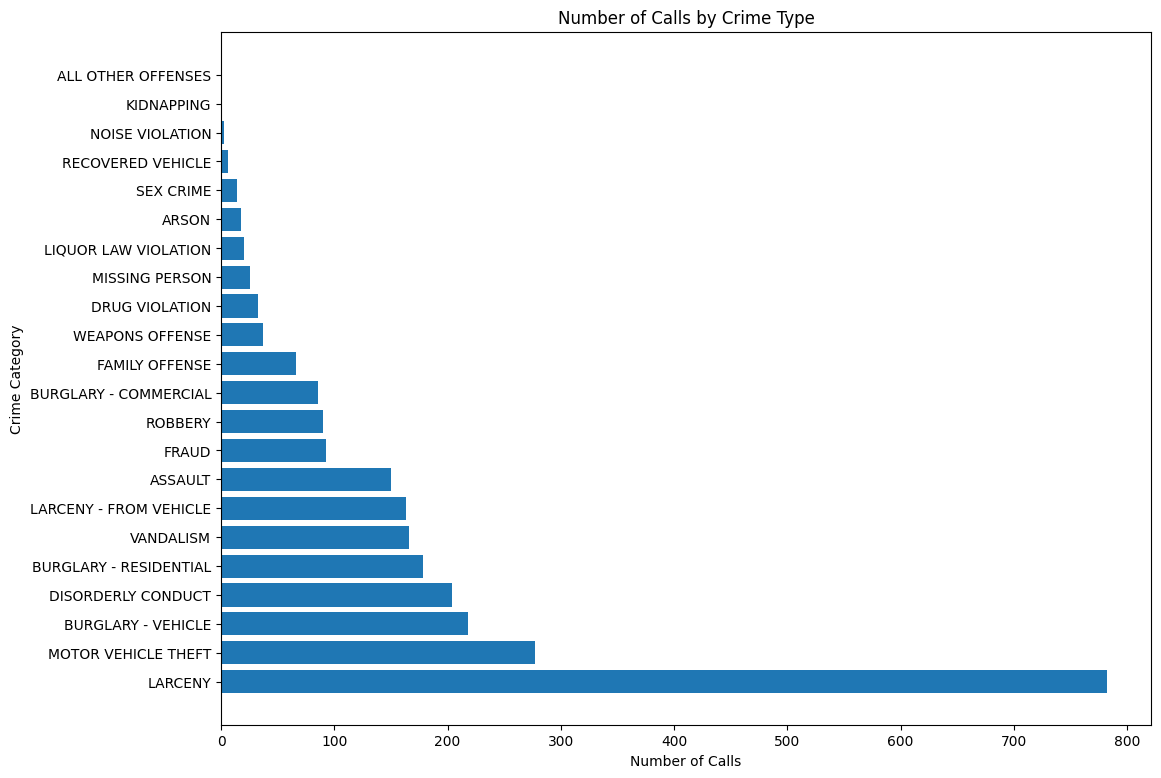

In [18]:
# DEMO CELL: assign demo to 1 or 2.
demo = 1


calls_cvlegend = calls['CVLEGEND'].value_counts()

if demo == 1:
    plt.barh(calls_cvlegend.index, calls_cvlegend) # creates figure and axes
    print(f"Demo {demo}: Using plt methods to update plot")
    plt.ylabel("Crime Category")               # uses most recently plotted axes
    plt.xlabel("Number of Calls")
    plt.title("Number of Calls by Crime Type")

elif demo == 2:
    print(f"Demo {demo}: Using axes methods to update plot")
    plt.barh(calls_cvlegend.index, calls_cvlegend) # creates figure and axes
    ax = plt.gca()
    ax.set_ylabel("Crime Category")
    ax.set_xlabel("Number of Calls")
    ax.set_title("Axes methods: Number of Calls by Crime Type")
else:
    print("Error: Please assign the demo variable to 1 or 2.")

plt.show()

<br/>

### An Additional Note on Plotting in Jupyter Notebooks

You may have noticed that many of our plotting code cells end with a semicolon `;` or `plt.show()`. The former prevents any extra output from the last line of the cell; the latter explicitly returns (and outputs) the figure. Try adding this to your own code in the following questions!

<br/>
<hr style="border: 1px solid #fdb515;" />

## Question 2

Now it is your turn to make a plot using `matplotlib`.  Let's start by transforming the data so that it is easier to work with.

The `CVDOW` field isn't named helpfully and it is hard to see the meaning from the data alone. According to the website [linked](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5) at the top of this notebook, `CVDOW` is actually indicating the day that events happened. 0->Sunday, 1->Monday ... 6->Saturday. 

## Question 2a

Add a new column `DayType` into the `calls` dataframe.  We're going to split up the days of the week into two groups:  'Weekend' (eg.for Saturdays and Sundays) or 'Weekday' (for 'Mon' through 'Fri')  based on the corresponding value in CVDOW. For example, if the first 3 values of `CVDOW` are `[3, 6, 0]`, then the first 3 values of the `DayType` column should be `["Weekday", "Weekend", "Weekend"]`.

**Hint:** *Try using the [Series.map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function on `calls["CVDOW"]`.  

In [21]:
day_mapping = {0: 'Weekend', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekday', 6: 'Weekend'}

calls['DayType'] = calls['CVDOW'].map(day_mapping)
calls


,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,DayType
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA,Weekday
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA,Weekend
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...
2627,20058742,BURGLARY RESIDENTIAL,12/21/2020 12:00:00 AM,12:45,BURGLARY - RESIDENTIAL,1,06/15/2021 12:00:00 AM,"1300 BLOCK UNIVERSITY AVE\nBerkeley, CA\n(37.8...",1300 BLOCK UNIVERSITY AVE,Berkeley,CA,Weekday
2628,21008017,BRANDISHING,02/24/2021 12:00:00 AM,15:06,WEAPONS OFFENSE,3,06/15/2021 12:00:00 AM,"100 BLOCK SEAWALL DR\nBerkeley, CA\n(37.863611...",100 BLOCK SEAWALL DR,Berkeley,CA,Weekday
2629,21013239,THEFT FELONY (OVER $950),03/24/2021 12:00:00 AM,0:00,LARCENY,3,06/15/2021 12:00:00 AM,"2800 BLOCK HILLEGASS AVE\nBerkeley, CA\n(37.85...",2800 BLOCK HILLEGASS AVE,Berkeley,CA,Weekday
2630,21018143,THEFT MISD. (UNDER $950),04/24/2021 12:00:00 AM,18:35,LARCENY,6,06/15/2021 12:00:00 AM,"2500 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.86...",2500 BLOCK TELEGRAPH AVE,Berkeley,CA,Weekend


In [22]:
grader.check("q2a")

q2a results: All test cases passed!

---
## Question 2b

Now let's look at the `EVENTTM` column which indicates the time for events. Since it contains hour and minute information, let's extract the hour info and create a new column named `Hour` in the `calls` dataframe. You should save the hour as an `int`.


**Hint:** *Your code should only require one line*.<br/>
**Hint 2:** The vectorized `Series.str[ind]` performs integer indexing on an array entry.


In [25]:
calls["Hour"] = calls["EVENTTM"].str.split(":").str[0].astype(int)
calls

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,DayType,Hour
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA,Weekday,12
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA,Weekend,17
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA,Weekday,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,20058742,BURGLARY RESIDENTIAL,12/21/2020 12:00:00 AM,12:45,BURGLARY - RESIDENTIAL,1,06/15/2021 12:00:00 AM,"1300 BLOCK UNIVERSITY AVE\nBerkeley, CA\n(37.8...",1300 BLOCK UNIVERSITY AVE,Berkeley,CA,Weekday,12
2628,21008017,BRANDISHING,02/24/2021 12:00:00 AM,15:06,WEAPONS OFFENSE,3,06/15/2021 12:00:00 AM,"100 BLOCK SEAWALL DR\nBerkeley, CA\n(37.863611...",100 BLOCK SEAWALL DR,Berkeley,CA,Weekday,15
2629,21013239,THEFT FELONY (OVER $950),03/24/2021 12:00:00 AM,0:00,LARCENY,3,06/15/2021 12:00:00 AM,"2800 BLOCK HILLEGASS AVE\nBerkeley, CA\n(37.85...",2800 BLOCK HILLEGASS AVE,Berkeley,CA,Weekday,0
2630,21018143,THEFT MISD. (UNDER $950),04/24/2021 12:00:00 AM,18:35,LARCENY,6,06/15/2021 12:00:00 AM,"2500 BLOCK TELEGRAPH AVE\nBerkeley, CA\n(37.86...",2500 BLOCK TELEGRAPH AVE,Berkeley,CA,Weekend,18


In [26]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

---
## Question 2c

Use seaborn to create a **density** histogram showing the distribution of calls by hour.  
Include the Kernal Density Estimate (KDE) graph on your histogram.  

Be sure that your axes are labeled and that your plot is titled.



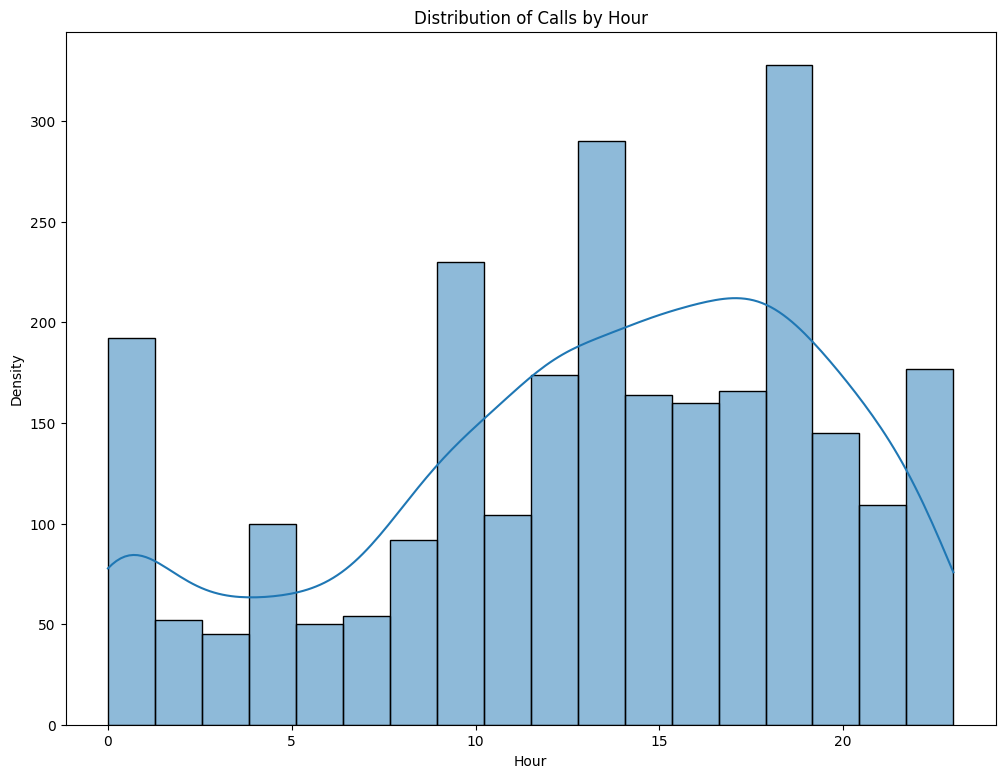

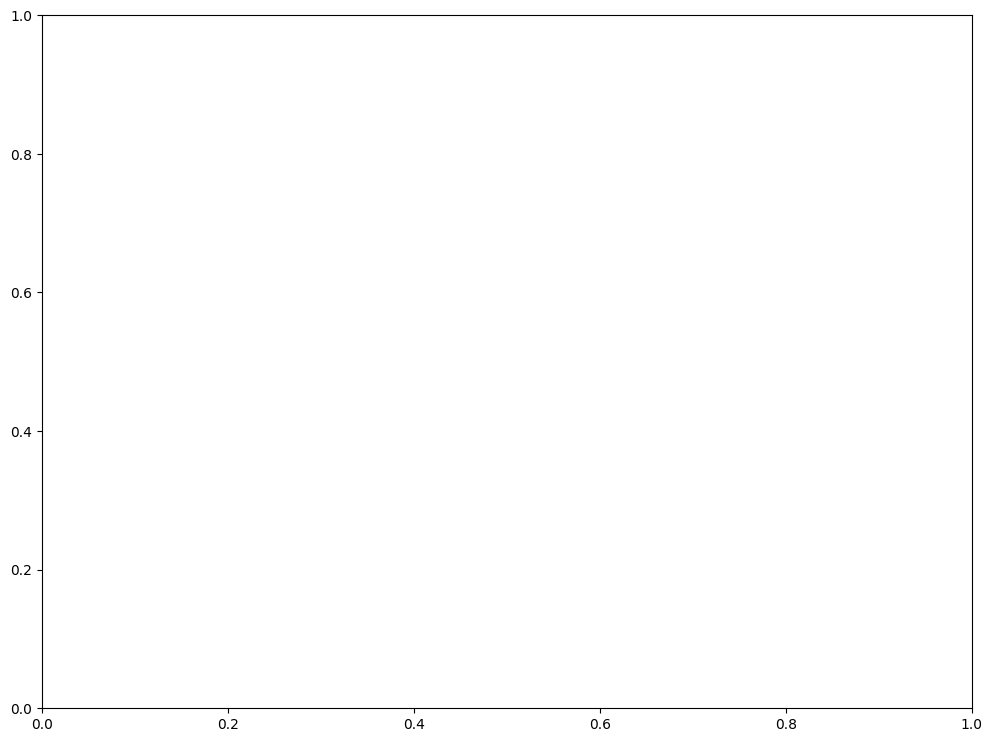

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create density histogram with KDE plot
sns.histplot(data=calls, x='Hour', kde=True)

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Density')
plt.title('Distribution of Calls by Hour')

# Show plot
plt.show()

# Leave this for grading purposes
ax_3d = plt.gca()

<!-- END QUESTION -->

---
### Question 2d

Calculate the following summary statistics about the distribution of calls by hour (you can use built-in functions):
i).  Mean
ii).  Median
iii). First Quartile
iv).  Third Quartile
v).  IQR
  


In [28]:

mean_hour = calls['Hour'].mean()

median_hour = calls['Hour'].median()

q1 = calls['Hour'].quantile(0.25)

q3 = calls['Hour'].quantile(0.75)

IQR = q3 - q1


In [29]:
grader.check("q2d")

q2d results: All test cases passed!

<!-- BEGIN QUESTION -->

---
### Question 2e

i).  Use seaborn to construct a box plot showing the distribution of calls by hour. 

ii).  To better understand the time of day a report occurs we could **stratify the analysis by DayType (i.e. by weekday vs weekends).** 

Use seaborn to create side-by-side violin plots comparing the distribution of calls by hour on the weekend vs weekday (hint: see the violin plot documentation on how to stratify by a column in the dataframe  https://seaborn.pydata.org/generated/seaborn.violinplot.html )

Note:  For aesthetic purposes only the violin plot continues past the end of the whiskers (i.e. past 0 and 24 hours);  however it is not possible to get data points outside of the whiskers for this distribution.  



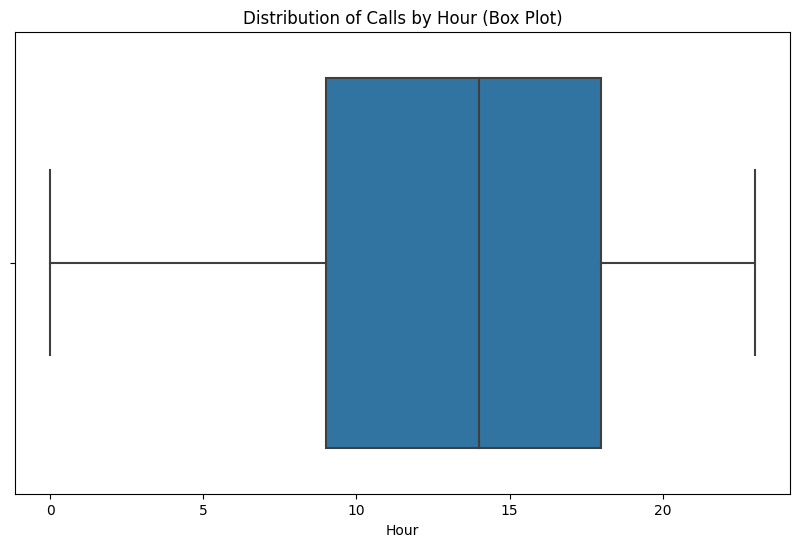

In [30]:
# Create a box plot showing the distribution of calls by hour
plt.figure(figsize=(10, 6))
sns.boxplot(data=calls, x='Hour')
plt.xlabel('Hour')
plt.title('Distribution of Calls by Hour (Box Plot)')
plt.show()

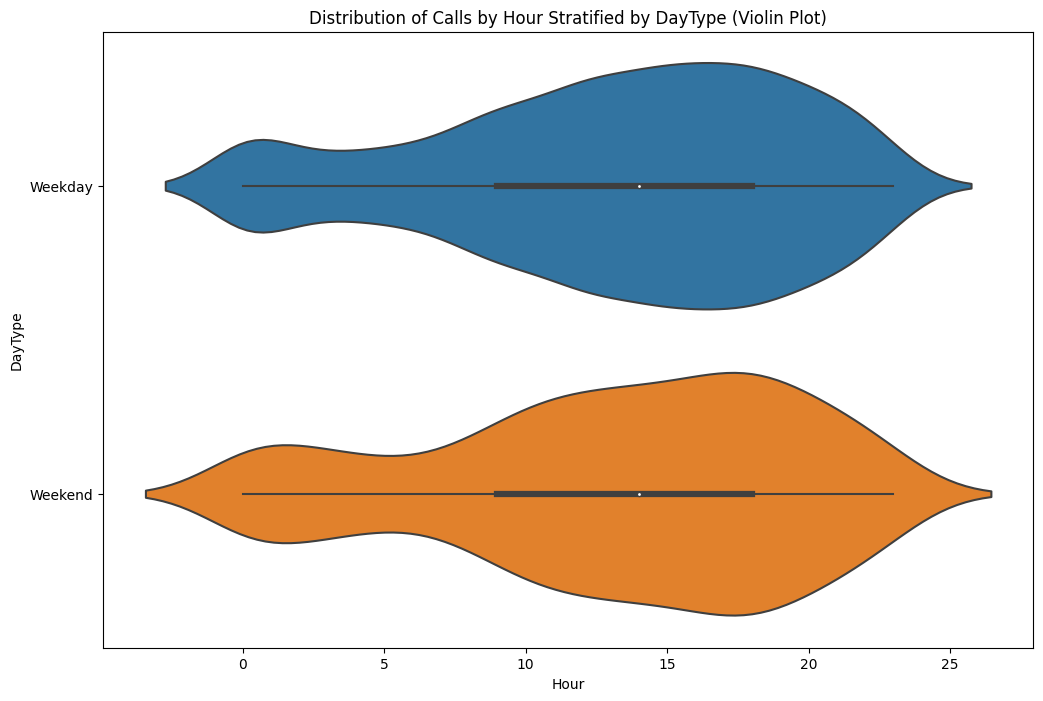

In [31]:
# Create side-by-side violin plots comparing the distribution of calls by hour on the weekend vs weekday
plt.figure(figsize=(12, 8))
sns.violinplot(data=calls, x='Hour', y='DayType')
plt.xlabel('Hour')
plt.ylabel('DayType')
plt.title('Distribution of Calls by Hour Stratified by DayType (Violin Plot)')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

---
## Question 2f

Based on your histogram, boxplot, and violin plots above, what observations can you make about the patterns of calls? Answer each of the following questions:

* Are there more calls in the day or at night?
* What are the most and least popular times?
* Do call patterns and/or IQR vary by weekend vs weekday?


According to all 3 visualizations, there are typically more calls in the afternoon to night time in comparison to the day. 

The least popular times for calls is around hour 3-4 whereas the most popular times for calls is around hour 17.

According to the violin plot, we can derive that the call patterns are for the most part similar between weekends and weekdays. 

<!-- END QUESTION -->

### Visualizing by location

Let's extract the GPS coordinates (latitude, longitude) from the `Block_Location` of each record.

In [32]:
# an example block location entry
calls.loc[4, 'Block_Location']

'2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066, -122.253407)'


We can use regular expressions to create a dataframe `calls_lat_lon` that has two columns titled `Lat` and `Lon`, containing the respective latitude and longitude of each record in `calls`.

Regular expressions are out of the scope of CSCI 3022, but you can learn more about them here: `Series.str.extract` [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html?highlight=extract#pandas.Series.str.extract).



In [33]:

# OPTION 1: Using unnamed groups
calls_lat_lon = (
    calls['Block_Location']
    .str.extract("\((\d+\.\d+)\, (-\d+\.\d+)\)")
)
calls_lat_lon.columns = ['Lat', 'Lon']

# OPTION 2: fancy version
calls_lat_lon = (
    calls['Block_Location']
    .str.extract(".*\((?P<Lat>\d*\.\d*)\, (?P<Lon>-?\d*\.\d*)\)", expand=True)
)


calls_lat_lon.head(10)

,Lat,Lon
0,37.869058,-122.270455
1,37.869058,-122.270455
2,37.864908,-122.267289
3,37.863934,-122.250262
4,37.86066,-122.253407
5,37.881957,-122.269551
6,37.867426,-122.269138
7,37.858116,-122.268002
8,37.868355,-122.274953
9,37.851491,-122.28563


---

## Question 3a: Join Tables

Let's include the GPS data into our `calls` data. In the below cell, use `calls_lat_lon` to add two new columns called `Lat` and `Lon` to the `calls` dataframe.

**Hint**: `pd.merge` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html?highlight=merge#pandas.DataFrame.merge)) could be useful here. Note that the order of records in `calls` and `calls_lat_lon` are the same.


In [34]:
calls = pd.merge(calls, calls_lat_lon[['Lat', 'Lon']], left_index=True, right_index=True)
# Your code above this line
calls.sample(5)      # shows a selection of random rows

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,DayType,Hour,Lat,Lon
236,21024853,VANDALISM,06/05/2021 12:00:00 AM,8:30,VANDALISM,6,06/15/2021 12:00:00 AM,"1400 BLOCK DERBY ST\nBerkeley, CA\n(37.858448,...",1400 BLOCK DERBY ST,Berkeley,CA,Weekend,8,37.858448,-122.282308
2079,21000371,BURGLARY RESIDENTIAL,01/01/2021 12:00:00 AM,8:13,BURGLARY - RESIDENTIAL,5,06/15/2021 12:00:00 AM,"1700 BLOCK HIGHLAND PL\nBerkeley, CA\n(37.8774...",1700 BLOCK HIGHLAND PL,Berkeley,CA,Weekday,8,37.877482,-122.256109
1761,21011386,BURGLARY AUTO,03/16/2021 12:00:00 AM,6:00,BURGLARY - VEHICLE,2,06/15/2021 12:00:00 AM,"1700 BLOCK SOLANO AVE\nBerkeley, CA\n(37.89121...",1700 BLOCK SOLANO AVE,Berkeley,CA,Weekday,6,37.891214,-122.282158
2608,21019580,THEFT MISD. (UNDER $950),05/04/2021 12:00:00 AM,7:00,LARCENY,2,06/15/2021 12:00:00 AM,"1800 BLOCK PARKER ST\nBerkeley, CA\n(37.861283...",1800 BLOCK PARKER ST,Berkeley,CA,Weekday,7,37.861283,-122.273911
1878,21008337,VEHICLE STOLEN,02/25/2021 12:00:00 AM,20:30,MOTOR VEHICLE THEFT,4,06/15/2021 12:00:00 AM,"1600 BLOCK PRINCE ST\nBerkeley, CA\n(37.85177,...",1600 BLOCK PRINCE ST,Berkeley,CA,Weekday,20,37.85177,-122.276489


In [35]:
grader.check("q3a")

q3a results: All test cases passed!

---
## Question 3b: Check for Missing Values

It seems like every record has valid GPS coordinates:

In [36]:
# just run this cell
# fraction of valid lat/lon entries
(~calls[["Lat", "Lon"]].isna()).mean()

Lat    1.0
Lon    1.0
dtype: float64

However, a closer examination of the data reveals something else. Here's the first few records of our data again:

In [37]:
calls.head(5)

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,DayType,Hour,Lat,Lon
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10,37.869058,-122.270455
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10,37.869058,-122.270455
2,21090494,THEFT MISD. (UNDER $950),04/19/2021 12:00:00 AM,12:15,LARCENY,1,06/15/2021 12:00:00 AM,"2100 BLOCK HASTE ST\nBerkeley, CA\n(37.864908,...",2100 BLOCK HASTE ST,Berkeley,CA,Weekday,12,37.864908,-122.267289
3,21090204,THEFT FELONY (OVER $950),02/13/2021 12:00:00 AM,17:00,LARCENY,6,06/15/2021 12:00:00 AM,"2600 BLOCK WARRING ST\nBerkeley, CA\n(37.86393...",2600 BLOCK WARRING ST,Berkeley,CA,Weekend,17,37.863934,-122.250262
4,21090179,BURGLARY AUTO,02/08/2021 12:00:00 AM,6:20,BURGLARY - VEHICLE,1,06/15/2021 12:00:00 AM,"2700 BLOCK GARBER ST\nBerkeley, CA\n(37.86066,...",2700 BLOCK GARBER ST,Berkeley,CA,Weekday,6,37.86066,-122.253407


There is another field that tells us whether we have a valid `Block_Location` entry per record---i.e., with GPS coordinates (latitude, longitude) that match the listed block location. What is it?

In the below cell, use the field you found to create a new dataframe, `missing_lat_lon`, that contains only the rows of `calls` that have invalid latitude and longitude data. Your new dataframe should have all the same columns of `calls`.


In [55]:
missing_lat_lon = calls[calls['BLKADDR'].isna()]

missing_lat_lon.head()

,CASENO,OFFENSE,EVENTDT,EVENTTM,CVLEGEND,CVDOW,InDbDate,Block_Location,BLKADDR,City,State,DayType,Hour,Lat,Lon
0,21014296,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:58,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10,37.869058,-122.270455
1,21014391,THEFT MISD. (UNDER $950),04/01/2021 12:00:00 AM,10:38,LARCENY,4,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10,37.869058,-122.270455
215,21019124,BURGLARY RESIDENTIAL,04/30/2021 12:00:00 AM,10:00,BURGLARY - RESIDENTIAL,5,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,10,37.869058,-122.270455
260,21000289,VEHICLE STOLEN,01/01/2021 12:00:00 AM,12:00,MOTOR VEHICLE THEFT,5,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekday,12,37.869058,-122.270455
633,21013362,BURGLARY AUTO,03/27/2021 12:00:00 AM,4:20,BURGLARY - VEHICLE,6,06/15/2021 12:00:00 AM,"Berkeley, CA\n(37.869058, -122.270455)",NaN,Berkeley,CA,Weekend,4,37.869058,-122.270455


In [44]:
grader.check("q3b")

q3b results: All test cases passed!

---

### Check Missing Values

Now let us explore if there is a pattern to which types of records have missing latitude and longitude entries.

First we'll create a series that collects the dates on which the missing data occurred and plot this:  

/tmp/ipykernel_138/1145892109.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  missing_by_time = (pd.to_datetime(missing_lat_lon['EVENTDT'])


Text(0, 0.5, 'Calls with Missing Data')

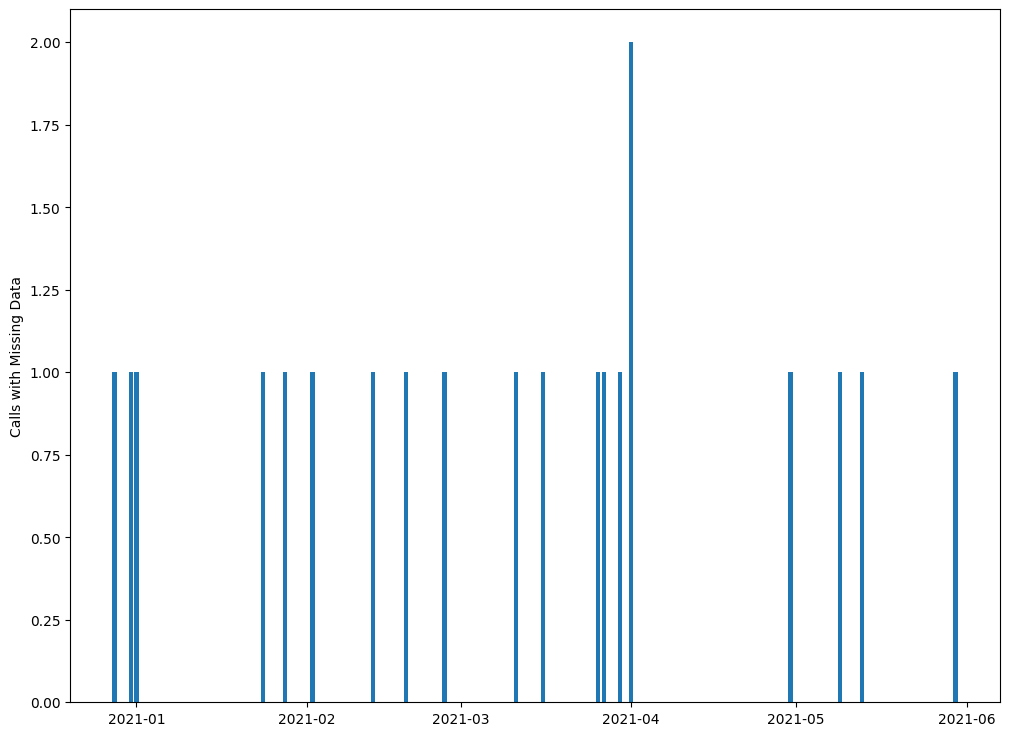

In [45]:
# just run this cell
missing_by_time = (pd.to_datetime(missing_lat_lon['EVENTDT'])
                   .value_counts()
                   .sort_index())
                   
                   
plt.bar(missing_by_time.index, missing_by_time)
plt.ylabel("Calls with Missing Data")

### Question 3c


i).  Create a series `missing_by_crime` that calculates the fraction of missing (lat/long) data by event type.  **Your series should only include events that have missing lat/long data.**  Sort the percentages from highest to lowest.  



The first few rows of your series should look as follows:



| |     |
|------|------|
|FRAUD  | 0.021505 |
|BURGLARY - VEHICLE     | 0.018349 |
|BURGLARY - COMMERCIAL    |  0.011628 |





**To receive credit**  use formatting so that all of your code can be seen in the PDF (any code that is cutoff will not receive full credit).  See HW 3 for tips on how to use newlines inside chained method calls.


ii).  Then plot the series `missing_by_crime` as a horizontal bar plot.  Label the x-axis. 



<!-- BEGIN QUESTION -->



In [56]:
missing_lat_lon = calls[calls['BLKADDR'].isna()]

total_events = calls['CVLEGEND'].value_counts()

missing_events = missing_lat_lon['CVLEGEND'].value_counts()

missing_by_crime = missing_events / total_events

missing_by_crime = missing_by_crime.sort_values(ascending=False)

missing_by_crime

CVLEGEND
FRAUD                     0.021505
BURGLARY - VEHICLE        0.018349
BURGLARY - COMMERCIAL     0.011628
BURGLARY - RESIDENTIAL    0.011236
MOTOR VEHICLE THEFT       0.010830
LARCENY                   0.007673
LARCENY - FROM VEHICLE    0.006135
DISORDERLY CONDUCT        0.004902
ALL OTHER OFFENSES             NaN
ARSON                          NaN
ASSAULT                        NaN
DRUG VIOLATION                 NaN
FAMILY OFFENSE                 NaN
KIDNAPPING                     NaN
LIQUOR LAW VIOLATION           NaN
MISSING PERSON                 NaN
NOISE VIOLATION                NaN
RECOVERED VEHICLE              NaN
ROBBERY                        NaN
SEX CRIME                      NaN
VANDALISM                      NaN
WEAPONS OFFENSE                NaN
Name: count, dtype: float64

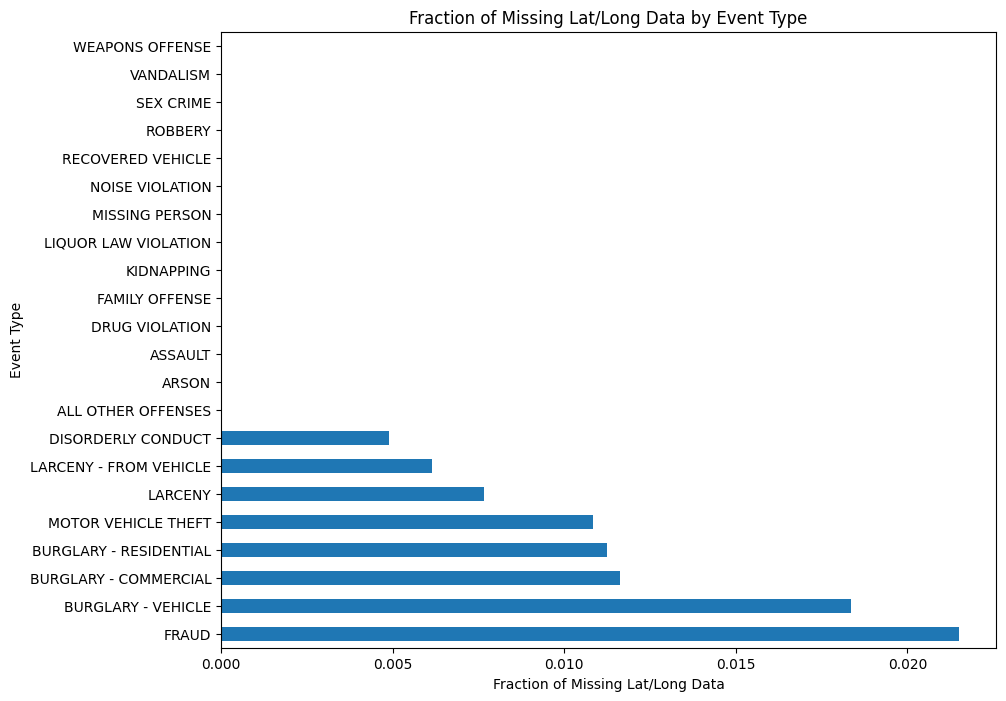

In [57]:
# Plot the series missing_by_crime as a horizontal bar plot
plt.figure(figsize=(10, 8))
missing_by_crime.plot(kind='barh')
plt.xlabel('Fraction of Missing Lat/Long Data')
plt.ylabel('Event Type')
plt.title('Fraction of Missing Lat/Long Data by Event Type')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 3d
Based on the plots above, are there any patterns among entries that are missing latitude/longitude data? 

Based on the plots above, give your recommendation as to how we should handle the missing data, and justify your answer:

Option 1). Drop rows with missing data

Option 2). Set missing data to NaN

Option 3). Impute data

Some event types have relatively high fractions of missing latitude and longitude data, such as FRAUD, BURGLARY - VEHICLE, BURGLARY - COMMERCIAL, BURGLARY - RESIDENTIAL, MOTOR VEHICLE THEFT, and LARCENY. 

Based on the data, I would most likely choose Option 2: set missing data to NaN. This approach allows for the inclusion of the entire dataset in the analysis while acknowledging the missing values, which can be addressed using appropriate statistical techniques during analysis. Moreover, dropping rows (Option 1) may result in the loss of valuable information, and imputation (Option 3) may introduce biases if the imputation methods are not well-suited to the dataset.


<!-- END QUESTION -->

## Explore

The below cell plots a map of phonecalls by GPS coordinates (latitude, longitude); 

To plot this we will first drop the missing location data.

In [58]:
# just run this cell to get an interactive heat map of the crime data

import folium
import folium.plugins

SF_COORDINATES = (37.87, -122.28)
sf_map = folium.Map(location=SF_COORDINATES, zoom_start=13)
locs = calls.drop(missing_lat_lon.index)[['Lat', 'Lon']].astype('float').values
heatmap = folium.plugins.HeatMap(locs.tolist(), radius=10)
sf_map.add_child(heatmap)



<!-- BEGIN QUESTION -->


## Question 3e

Based on the above map, what could be some **drawbacks** of using the location fields in this dataset to draw conclusions about crime in Berkeley? Here are some sub-questions to consider:

* Zoom into the map.  Why are all the calls located on the street and often at intersections?
* UC Berkeley campus is on the area of the map titled "Observatory Hill", which appears to have no calls.  What are some factors about our data that could explain this?  Is it really the case that their campus is the safest place to be in the area? The dataset information [linked](https://data.cityofberkeley.info/Public-Safety/Berkeley-PD-Calls-for-Service/k2nh-s5h5) at the top of this notebook may also give more context.


The calls are located primarily on streets and often at intersections. This bias in the data could be due to the nature of the reporting system or the way in which locations are recorded. Crimes occurring in parks, alleys, or other less frequented areas may be underrepresented in the dataset. 

The absence of calls in the area labeled "Observatory Hill" where UC Berkeley campus is located may not accurately reflect the safety of the campus. There are several factors to consider:

Reporting Bias: Crimes occurring on the campus may be reported through a different reporting system or to a different authority, leading to the underrepresentation of incidents in this dataset.

Security Measures: The presence of campus security, surveillance systems, and other safety measures may contribute to lower reported crime rates on the campus compared to surrounding areas.

Crime Nature: The types of crimes that occur on a university campus may differ from those in surrounding residential or commercial areas, leading to discrepancies in reported incidents.

<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 4!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 4 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW4 Autograded assignment in Gradescope.

* **Homework 4 Manually Graded**: Submit your hw04.PDF to the HW1 Manually Graded assignment in Gradescope.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw04.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [61]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    1b results: All test cases passed!

    1c results: All test cases passed!

    q1d results: All test cases passed!

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q2d results: All test cases passed!

    q3a results: All test cases passed!

    q3b results: All test cases passed!
